In [1]:
from dataset import GenderRecognitionDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
CSV_DIR = './faces.csv'
BATCH_SIZE = 8
NUM_WORKERS = 8
seed = 42

In [3]:
# Set transforms
transforms = A.Compose([
            A.Rotate(limit=90, p=0.8),
            A.HorizontalFlip(),
            A.VerticalFlip(),
            A.RandomBrightnessContrast(),
            ToTensorV2(),
        ])

In [22]:
# Load data
df = pd.read_csv(CSV_DIR)
print(f'len df: {len(df)}')
train_df, val_df = train_test_split(df.sample(1500), test_size=0.3, random_state=seed)
val_df, test_df = train_test_split(val_df, test_size=0.5, random_state=seed)

train_dataset = GenderRecognitionDataset(train_df, transforms=transforms)
val_dataset = GenderRecognitionDataset(val_df)
# Get dataloaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)


len df: 16710


train batch shape: torch.Size([8, 3, 299, 299]) with targets shaped torch.Size([8])
val batch shape: torch.Size([8, 3, 299, 299]) with targets shaped torch.Size([8])


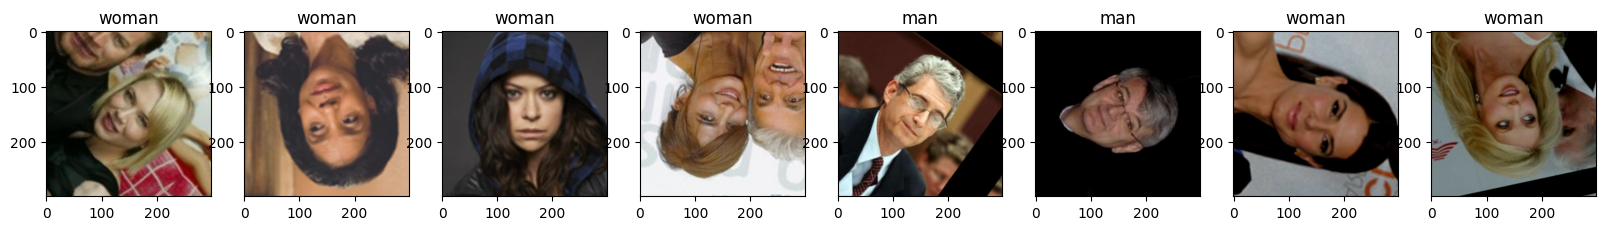

In [24]:
# Get a batch from the dataloader and display it
train_images, train_labels = next(iter(train_loader))
val_images, val_labels = next(iter(val_loader))
print(f'train batch shape: {train_images.shape} with targets shaped {train_labels.shape}')
print(f'val batch shape: {val_images.shape} with targets shaped {val_labels.shape}')

# Let's see some transformed images
fig, ax = plt.subplots(nrows=1, ncols=train_images.shape[0], figsize=(20, 10))
for i in range(train_images.shape[0]):
    ax[i].imshow(train_images[i].permute(1, 2, 0))
    gender = 'man' if train_labels[i] == 0 else 'woman'
    ax[i].set_title(gender)